In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
migrationData = pd.read_csv('C:/Users/fernando.dorantes/local/Git_repositories/Repo30DayMapChallenge2024/Data/Day_26Data/migracion_00_xlsx/migracion_datos_inegi.csv', 
                            encoding='latin-1')


In [3]:
populationData = pd.read_csv('C:/Users/fernando.dorantes/local/Git_repositories/Repo30DayMapChallenge2024/Data/Day_21Data/ITER_NALCSV20.csv')

C:\Users\fernando.dorantes\AppData\Local\Temp\ipykernel_59932\914592481.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  populationData = pd.read_csv('C:/Users/fernando.dorantes/local/Git_repositories/Repo30DayMapChallenge2024/Data/Day_21Data/ITER_NALCSV20.csv')


In [4]:
munMap = gpd.read_file('C:/Users/fernando.dorantes/local/Git_repositories/Repo30DayMapChallenge2024/Data/mun23gw_c/mun23cw.shp')

In [5]:
populationData = populationData[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC','LONGITUD','LATITUD',
                'ALTITUD',	'POBTOT', 'POBFEM', 'POBMAS', 'P_5YMAS',]]

In [6]:
populationData = populationData[~populationData['NOM_MUN'].str.contains('Total')]
populationData = populationData[~populationData['LATITUD'].isnull()]

In [7]:
populationData.columns = [str(x).lower() for x in populationData.columns]

In [8]:
munMap.columns = [str(x).lower() for x in munMap.columns]

In [9]:
populationData[['altitud', 'pobtot', 'pobfem', 'pobmas', 'p_5ymas']] = populationData[['altitud', 'pobtot', 'pobfem', 'pobmas', 'p_5ymas']].apply(pd.to_numeric, errors='coerce')

In [10]:
munMap[['cvegeo', 'cve_ent', 'cve_mun', 'cov_', 'cov_id', 'area', 'perimeter']] = munMap[['cvegeo', 'cve_ent', 'cve_mun', 'cov_', 'cov_id', 'area', 'perimeter']].apply(pd.to_numeric, errors='coerce')

In [11]:
migrationData[['cve_entidad', 'cve_municipio', '2020']] = migrationData[['cve_entidad', 'cve_municipio', '2020']].apply(pd.to_numeric, errors='coerce')

In [12]:
populationData = populationData.groupby(['entidad', 'nom_ent', 'mun', 'nom_mun']).agg({'altitud': 'mean', 'pobtot':'sum', 'pobfem':'sum', 'pobmas':'sum', 'p_5ymas':'sum' }).reset_index()

In [13]:
migrationData = migrationData[~migrationData['desc_municipio'].isin(['Estados Unidos Mexicanos', 'Estatal'])]
migrationData = migrationData[migrationData['indicador']=='Población de 5 años y más emigrante']

migrationData= migrationData[['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio', 'id_indicador', 'indicador', '2020', 'unidad_medida']]
migrationData.rename(columns={'2020':'emigration_2020'},    inplace=True)

In [14]:
populationData['id'] = populationData['entidad'].astype(str) + '_' + populationData['mun'].astype(str)
migrationData['id'] = migrationData['cve_entidad'].astype(str) + '_' + migrationData['cve_municipio'].astype(str)
munMap['id'] = munMap['cve_ent'].astype(str) + '_' + munMap['cve_mun'].astype(str)

In [15]:
populationData.head()

,entidad,nom_ent,mun,nom_mun,altitud,pobtot,pobfem,pobmas,p_5ymas,id
0,1,Aguascalientes,1,Aguascalientes,1919.973451,948990,486138.0,460305.0,868758.0,1_1
1,1,Aguascalientes,2,Asientos,2028.843023,51536,26097.0,25079.0,45769.0,1_2
2,1,Aguascalientes,3,Calvillo,1761.734940,58250,29584.0,28430.0,52481.0,1_3
3,1,Aguascalientes,4,Cosío,1968.953125,17000,8626.0,8187.0,15082.0,1_4
4,1,Aguascalientes,5,Jesús María,1922.120930,129929,65492.0,63978.0,117160.0,1_5


In [16]:
migrationData.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,emigration_2020,unidad_medida,id
95,1,Aguascalientes,1,Aguascalientes,6200205277,Población de 5 años y más emigrante,26193.0,Personas,1_1
110,1,Aguascalientes,2,Asientos,6200205277,Población de 5 años y más emigrante,1260.0,Personas,1_2
125,1,Aguascalientes,3,Calvillo,6200205277,Población de 5 años y más emigrante,1151.0,Personas,1_3
140,1,Aguascalientes,4,Cosío,6200205277,Población de 5 años y más emigrante,484.0,Personas,1_4
155,1,Aguascalientes,5,Jesús María,6200205277,Población de 5 años y más emigrante,3409.0,Personas,1_5


In [17]:
munMap.head()

,cvegeo,cve_ent,cve_mun,nomgeo,nom_ent,cov_,cov_id,area,perimeter,geometry,id
0,1008,1,8,San JosÃ© de Gracia,Aguascalientes,0,1,857.790574,181.537599,"POLYGON ((2453326.553 1143576.423, 2453363.324...",1_8
1,1009,1,9,TepezalÃ¡,Aguascalientes,1,2,229.661012,89.329532,"POLYGON ((2481826.447 1149055.253, 2481589.221...",1_9
2,1007,1,7,RincÃ³n de Romos,Aguascalientes,2,3,372.295163,161.749880,"POLYGON ((2476760.231 1150329.045, 2476783.634...",1_7
3,1006,1,6,PabellÃ³n de Arteaga,Aguascalientes,3,4,195.735946,105.612997,"POLYGON ((2473996.656 1129304.114, 2474217.809...",1_6
4,1005,1,5,JesÃºs MarÃ­a,Aguascalientes,4,5,499.895092,163.500811,"POLYGON ((2463657.764 1116053.82, 2463738.92 1...",1_5


In [18]:
populationData.shape

(2469, 10)

In [19]:
migrationDataGeneral  = pd.merge(migrationData, populationData, on='id')

In [20]:
migrationDataGeneral  = pd.merge(migrationDataGeneral, munMap, on='id')

In [21]:
migrationDataGeneral.shape

(2469, 28)

In [22]:
migrationDataGeneral['percent_migration'] = migrationDataGeneral['emigration_2020']/migrationDataGeneral['p_5ymas']

In [23]:
migrationDataGeneral.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,emigration_2020,unidad_medida,id,entidad,...,cve_ent,cve_mun,nomgeo,nom_ent_y,cov_,cov_id,area,perimeter,geometry,percent_migration
0,1,Aguascalientes,1,Aguascalientes,6200205277,Población de 5 años y más emigrante,26193.0,Personas,1_1,1,...,1,1,Aguascalientes,Aguascalientes,8,9,1166.359247,256.631026,"POLYGON ((2486536.885 1117403.247, 2487286.391...",0.030150
1,1,Aguascalientes,2,Asientos,6200205277,Población de 5 años y más emigrante,1260.0,Personas,1_2,1,...,1,2,Asientos,Aguascalientes,7,8,543.374266,192.096428,"POLYGON ((2493552.647 1142361.087, 2493586.599...",0.027530
2,1,Aguascalientes,3,Calvillo,6200205277,Población de 5 años y más emigrante,1151.0,Personas,1_3,1,...,1,3,Calvillo,Aguascalientes,6,7,923.357832,171.636168,"POLYGON ((2429646.495 1120918.059, 2429711.745...",0.021932
3,1,Aguascalientes,4,Cosío,6200205277,Población de 5 años y más emigrante,484.0,Personas,1_4,1,...,1,4,CosÃ­o,Aguascalientes,5,6,128.383545,73.352682,"POLYGON ((2469550.852 1159302.642, 2469738.209...",0.032091
4,1,Aguascalientes,5,Jesús María,6200205277,Población de 5 años y más emigrante,3409.0,Personas,1_5,1,...,1,5,JesÃºs MarÃ­a,Aguascalientes,4,5,499.895092,163.500811,"POLYGON ((2463657.764 1116053.82, 2463738.92 1...",0.029097


In [24]:
#bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, float('inf')]
#labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', 
#          '30-35', '35-40', '40-45', '45-50', '50+']
#migrationDataGeneral['migration_category'] = pd.cut(
#    migrationDataGeneral['percent_migration'], bins=bins, labels=labels, right=False
#)

In [25]:
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, float('inf')]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', 
          '30%+']
migrationDataGeneral['migration_category'] = pd.cut(
    migrationDataGeneral['percent_migration'], bins=bins, labels=labels, right=False
)

In [26]:
migrationDataGeneral = gpd.GeoDataFrame(migrationDataGeneral)

In [27]:
migrationDataGeneral.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,emigration_2020,unidad_medida,id,entidad,...,cve_mun,nomgeo,nom_ent_y,cov_,cov_id,area,perimeter,geometry,percent_migration,migration_category
0,1,Aguascalientes,1,Aguascalientes,6200205277,Población de 5 años y más emigrante,26193.0,Personas,1_1,1,...,1,Aguascalientes,Aguascalientes,8,9,1166.359247,256.631026,"POLYGON ((2486536.885 1117403.247, 2487286.391...",0.030150,0-5%
1,1,Aguascalientes,2,Asientos,6200205277,Población de 5 años y más emigrante,1260.0,Personas,1_2,1,...,2,Asientos,Aguascalientes,7,8,543.374266,192.096428,"POLYGON ((2493552.647 1142361.087, 2493586.599...",0.027530,0-5%
2,1,Aguascalientes,3,Calvillo,6200205277,Población de 5 años y más emigrante,1151.0,Personas,1_3,1,...,3,Calvillo,Aguascalientes,6,7,923.357832,171.636168,"POLYGON ((2429646.495 1120918.059, 2429711.745...",0.021932,0-5%
3,1,Aguascalientes,4,Cosío,6200205277,Población de 5 años y más emigrante,484.0,Personas,1_4,1,...,4,CosÃ­o,Aguascalientes,5,6,128.383545,73.352682,"POLYGON ((2469550.852 1159302.642, 2469738.209...",0.032091,0-5%
4,1,Aguascalientes,5,Jesús María,6200205277,Población de 5 años y más emigrante,3409.0,Personas,1_5,1,...,5,JesÃºs MarÃ­a,Aguascalientes,4,5,499.895092,163.500811,"POLYGON ((2463657.764 1116053.82, 2463738.92 1...",0.029097,0-5%


In [28]:
colors = ['#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C', '#F03B20', 
          '#BD0026', '#800026', '#54278F', '#2B8CBE', '#08519C', '#023858']


colors = ['#FED976','#FD8D3C', '#F03B20', 
          '#BD0026', '#800026', '#54278F', '#2B8CBE', '#08519C']


colors2 = ['#FED976', '#FD8D3C', '#F03B20', 
          '#BD0026', '#800026', '#54278F', '#2B8CBE', '#08519C', '#023858']

color_map = dict(zip(labels, colors2))

In [29]:
viridis_original=plt.colormaps.get_cmap('cividis')
viridis_reverse = viridis_original.reversed() 


In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colorbar as cbar
import matplotlib as mpl

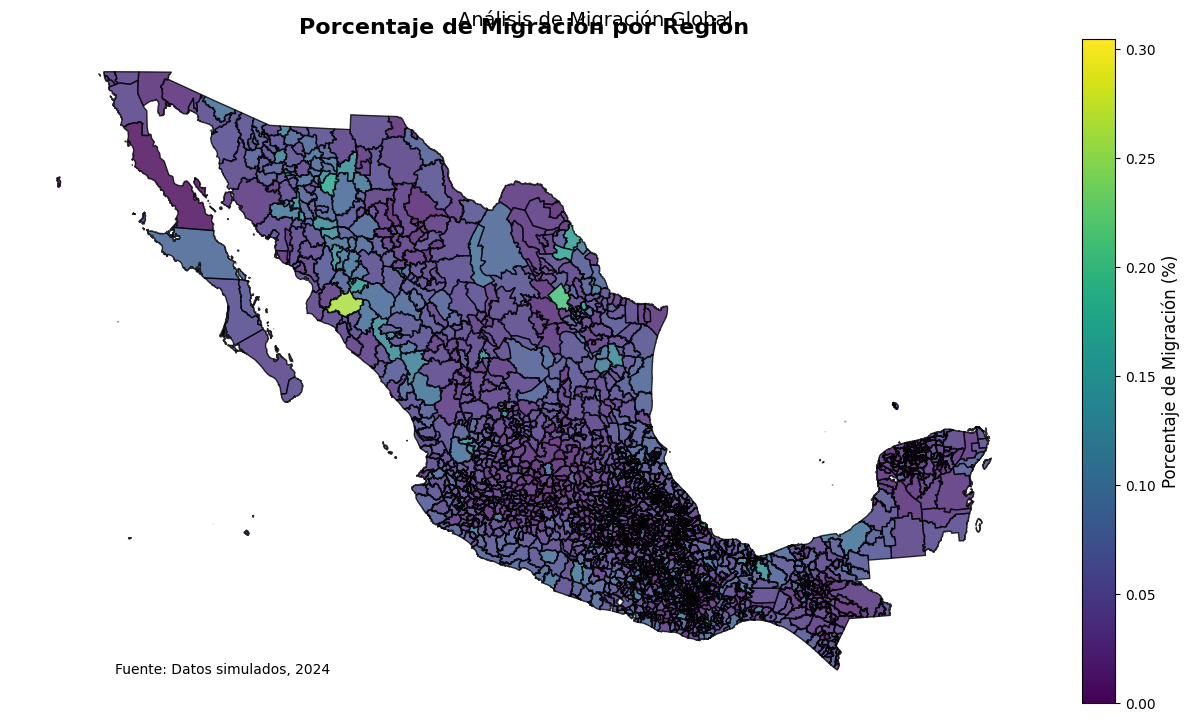

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Crear un rango personalizado para la leyenda de color
norm = Normalize(vmin=migrationDataGeneral['percent_migration'].min(), 
                 vmax=migrationDataGeneral['percent_migration'].max())

# Mapa principal
migrationDataGeneral.plot(
    column='percent_migration', 
    cmap='viridis',  # Paleta de colores
    legend=False,    # Desactivamos la leyenda predeterminada para personalizarla
    norm=norm,       # Normalización
    edgecolor='black', 
    alpha=0.8, 
    ax=ax
)

# Personalizar el título y subtítulo
ax.set_title("Porcentaje de Migración por Región", fontsize=16, weight='bold')
fig.suptitle("Análisis de Migración Global", fontsize=14, weight='regular', y=0.93)
ax.set_axis_off()  # Desactiva los ejes

# Crear una barra de colores personalizada
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm._A = []  # Necesario para ScalarMappable
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)

# Personalizar la barra de colores
cbar.set_label('Porcentaje de Migración (%)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Añadir un pie de página
fig.text(0.1, 0.1, "Fuente: Datos simulados, 2024", fontsize=10, ha='left')

# Mostrar el mapa
plt.tight_layout()
plt.show()

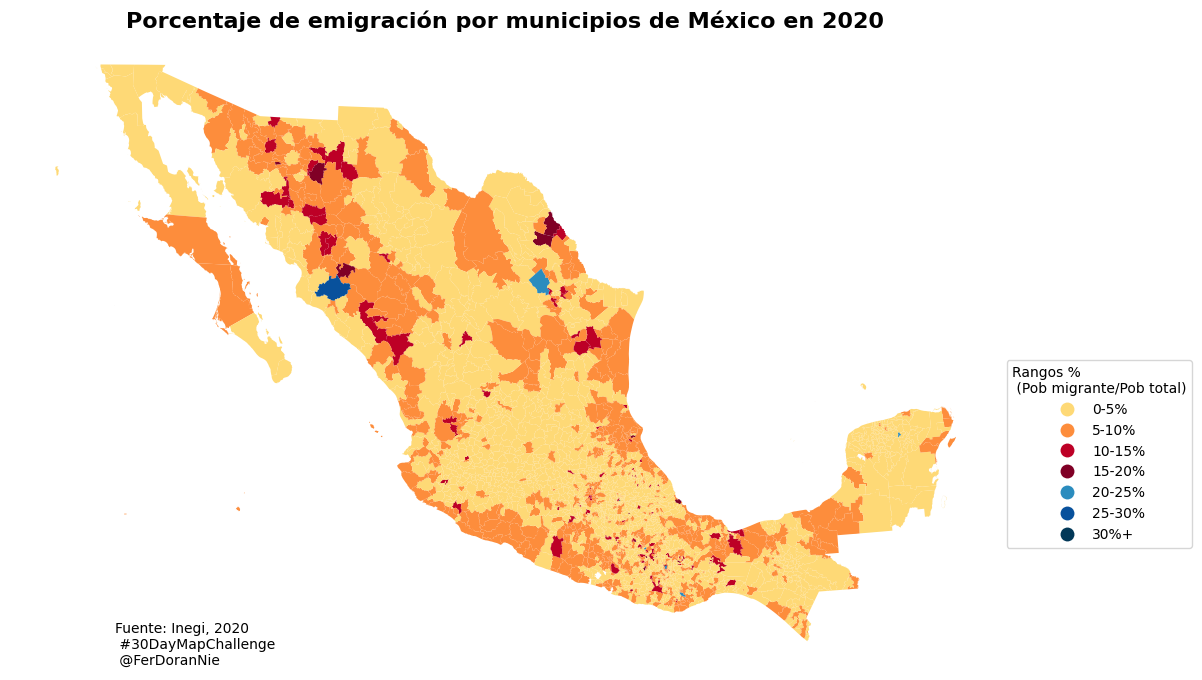

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Graficar usando las categorías y colores
migrationDataGeneral.plot(
    column='migration_category',
    cmap=mpl.colors.ListedColormap(colors2),  # Usar la paleta personalizada
    legend=True,  # Mostrar leyenda
    edgecolor=None,
    linewidth=0.5,
    ax=ax
)

# Personalizar título, subtítulo y leyenda
ax.set_title("Porcentaje de emigración por municipios de México en 2020", fontsize=16, weight='bold')
#ax.set_su
#fig.suptitle("Clasificación de Migración en Rangos de 5 en 5", fontsize=12)
ax.set_axis_off()

# Personalizar leyenda
legend = ax.get_legend()
legend.set_title("Rangos % \n (Pob migrante/Pob total)")
legend.set_bbox_to_anchor((1.2, 0.5))  # Mover la leyenda fuera del mapa
fig.text(0.1, 0.1, "Fuente: Inegi, 2020  \n #30DayMapChallenge \n @FerDoranNie", fontsize=10, ha='left')


output_path = "../images/migration_map_mexico_2020.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
# Mostrar el mapa
plt.tight_layout()
plt.show()